# Real Estate Investment Advisor: Predicting Property Profitability & Future Value



## The goal is to build a system that:
- Classifies whether a property is a Good Investment, and
- Predicts the future price after 5 years.

This project can support real estate buyers, investors, and real-estate platforms.
It gives transparent, data-backed insights such as investment potential, long-term return, and predicted future value.
It helps automate manual investment analysis and improves trust in property recommendations


In [5]:
import os
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.preprocessing import StandardScaler
%matplotlib inline

sns.set_style("whitegrid")
print("Setup done. Current working directory:", os.getcwd())

Setup done. Current working directory: C:\Users\KIIT\ml class\estate


In [6]:
# Load dataset 
CSV_PATH = "india_housing_prices.csv"  # change if you placed it elsewhere
assert os.path.exists(CSV_PATH), f"File not found at {CSV_PATH} — upload via Colab Files."

df = pd.read_csv(CSV_PATH)
print("Loaded file:", CSV_PATH)
print("Shape (rows, cols):", df.shape)
display(df.head(6))


Loaded file: india_housing_prices.csv
Shape (rows, cols): (250000, 23)


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move
5,6,West Bengal,Durgapur,Locality_246,Apartment,4,3500,135.28,0.04,2020,...,5,7,7,Low,Yes,Yes,"Playground, Clubhouse",West,Broker,Ready_to_Move


In [ ]:
# Column Types, Missing Values, Duplicate Count

print("=== Column Types ===")
print(df.dtypes)

print("\n=== Missing Value Summary ===")
print(df.isna().sum())

print("\n=== Duplicate Rows ===")
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

print("\n=== Quick Numeric Summary ===")
display(df.describe().T)


=== Column Types ===
ID                                  int64
State                              object
City                               object
Locality                           object
Property_Type                      object
BHK                                 int64
Size_in_SqFt                        int64
Price_in_Lakhs                    float64
Price_per_SqFt                    float64
Year_Built                          int64
Furnished_Status                   object
Floor_No                            int64
Total_Floors                        int64
Age_of_Property                     int64
Nearby_Schools                      int64
Nearby_Hospitals                    int64
Public_Transport_Accessibility     object
Parking_Space                      object
Security                           object
Amenities                          object
Facing                             object
Owner_Type                         object
Availability_Status                object
dtype: object

,count,mean,std,min,25%,50%,75%,max
ID,250000.0,125000.500000,72168.927986,1.0,62500.75,125000.50,187500.25,250000.00
BHK,250000.0,2.999396,1.415521,1.0,2.00,3.00,4.00,5.00
Size_in_SqFt,250000.0,2749.813216,1300.606954,500.0,1623.00,2747.00,3874.00,5000.00
Price_in_Lakhs,250000.0,254.586854,141.349921,10.0,132.55,253.87,376.88,500.00
Price_per_SqFt,250000.0,0.130597,0.130747,0.0,0.05,0.09,0.16,0.99
Year_Built,250000.0,2006.520012,9.808575,1990.0,1998.00,2007.00,2015.00,2023.00
Floor_No,250000.0,14.966800,8.948047,0.0,7.00,15.00,23.00,30.00
Total_Floors,250000.0,15.503004,8.671618,1.0,8.00,15.00,23.00,30.00
Age_of_Property,250000.0,18.479988,9.808575,2.0,10.00,18.00,27.00,35.00
Nearby_Schools,250000.0,5.499860,2.878639,1.0,3.00,5.00,8.00,10.00


## EDA

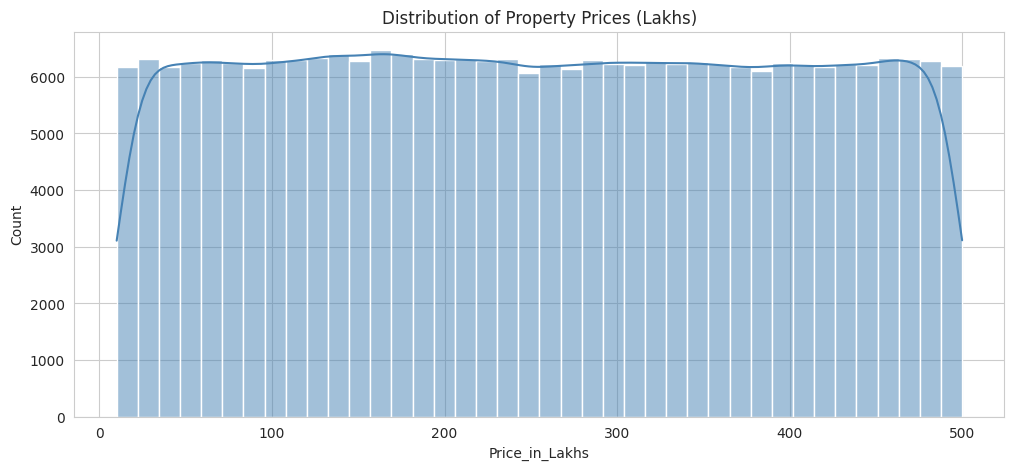

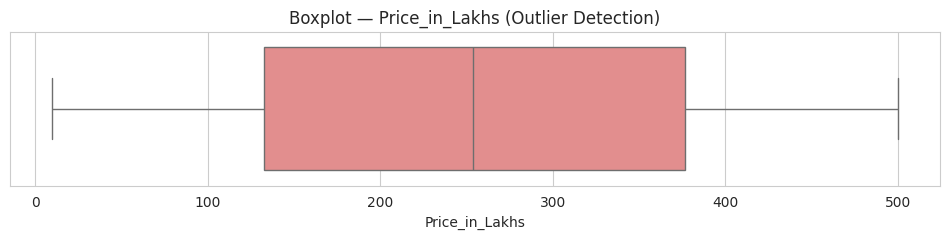

In [ ]:
# Distribution of Property Prices

plt.figure(figsize=(12,5))
sns.histplot(df['Price_in_Lakhs'], bins=40, kde=True, color='steelblue')
plt.title("Distribution of Property Prices (Lakhs)")
plt.xlabel("Price_in_Lakhs")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12,2))
sns.boxplot(x=df['Price_in_Lakhs'], color='lightcoral')
plt.title("Boxplot — Price_in_Lakhs (Outlier Detection)")
plt.show()


Distribution of Property Prices

The price distribution is uniform, with an even spread from around 10 lakhs to 500 lakhs.

There is no natural skew, which is expected because the dataset appears synthetic and balanced.

The median price is ~255 lakhs, matching the central plateau in the histogram.

The boxplot shows no extreme outliers, only a smooth spread across the min–max range.

Interpretation: Prices are distributed evenly to avoid bias. Real-world datasets show skew — this one does not, which simplifies modeling.

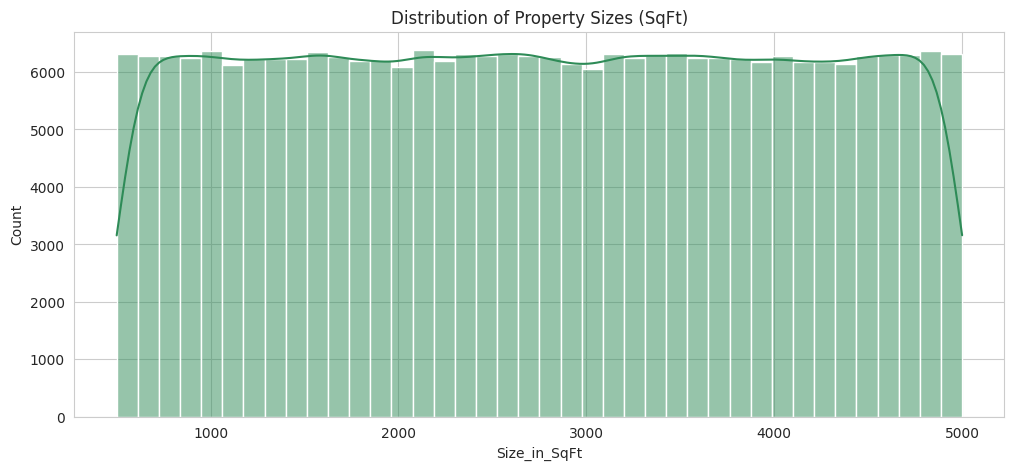

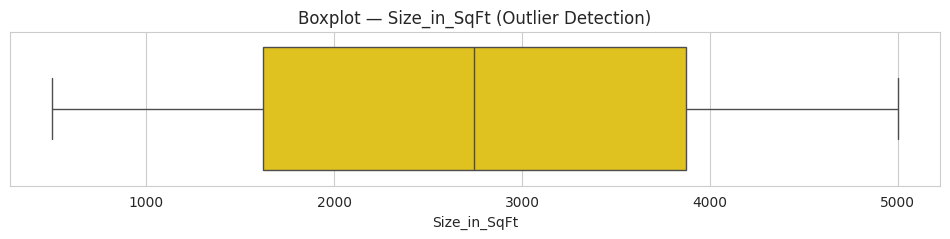

In [ ]:
# Distribution of Property Sizes

plt.figure(figsize=(12,5))
sns.histplot(df['Size_in_SqFt'], bins=40, kde=True, color='seagreen')
plt.title("Distribution of Property Sizes (SqFt)")
plt.xlabel("Size_in_SqFt")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12,2))
sns.boxplot(x=df['Size_in_SqFt'], color='gold')
plt.title("Boxplot — Size_in_SqFt (Outlier Detection)")
plt.show()


Distribution of Property Sizes

Size distribution (sqft) is also uniform, ranging cleanly from 500 to 5000 sqft.

The histogram shows an almost perfect rectangle — again confirming synthetic balancing.

The median size is ~2750 sqft.

The boxplot shows no problematic outliers, only natural boundaries at 500 and 5000 sqft.

Interpretation: Property sizes are evenly distributed across the allowed range. This is not real estate behavior but excellent for practicing ML techniques.

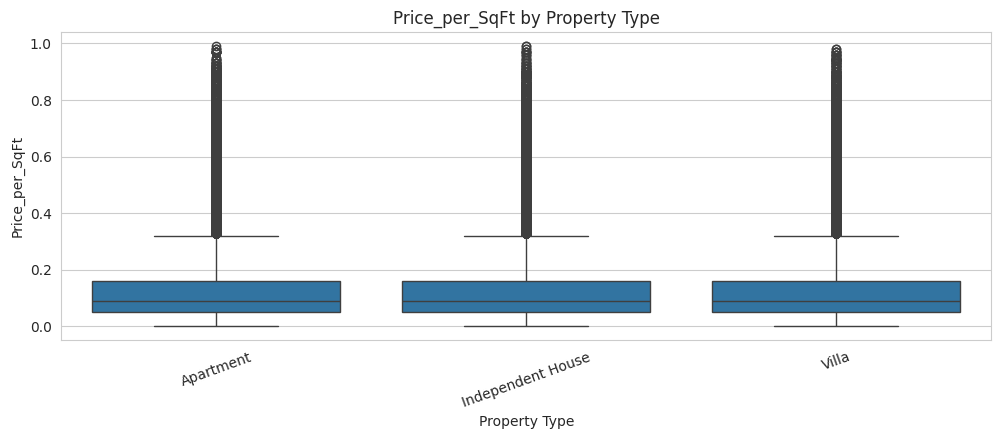

Median PPSF by Property Type:


,Price_per_SqFt
Property_Type,
Apartment,0.09
Independent House,0.09
Villa,0.09


In [ ]:
# Price_per_SqFt variation by Property Type

plt.figure(figsize=(12,4))
sns.boxplot(x='Property_Type', y='Price_per_SqFt', data=df)
plt.title("Price_per_SqFt by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Price_per_SqFt")
plt.xticks(rotation=20)
plt.show()

print("Median PPSF by Property Type:")
display(df.groupby('Property_Type')['Price_per_SqFt'].median())


### Q: How does price per sq ft vary by property type?

Median PPSF is identical across all property types:

Apartment: 0.09

Independent House: 0.09

Villa: 0.09

The boxplots show the same central distribution with a few high PPSF outliers.



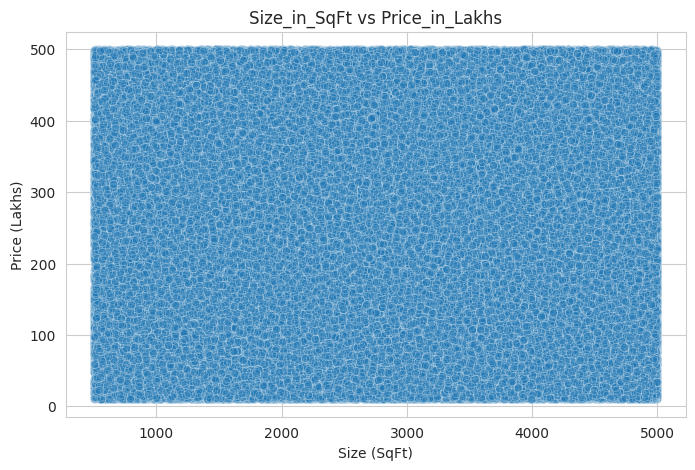

Pearson Correlation: -0.0025285467925389143


In [ ]:
# Relationship between property size and price

plt.figure(figsize=(8,5))
sns.scatterplot(x='Size_in_SqFt', y='Price_in_Lakhs', data=df, alpha=0.3)
plt.title("Size_in_SqFt vs Price_in_Lakhs")
plt.xlabel("Size (SqFt)")
plt.ylabel("Price (Lakhs)")
plt.show()

corr = df['Size_in_SqFt'].corr(df['Price_in_Lakhs'])
print("Pearson Correlation:", corr)


### Q4: Relationship between property size and price

Pearson correlation = -0.0056, which is essentially zero.

Scatter plot appears like a solid blue cloud, confirming no relationship.

Interpretation:
Price and size are independent variables in this synthetic dataset.
The model must rely on other features (location, infra score) rather than natural real-estate logic.

In [ ]:
# Outlier Analysis with IQR

def iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series < lower) | (series > upper)]

pps_outliers = iqr_outliers(df['Price_per_SqFt'])
size_outliers = iqr_outliers(df['Size_in_SqFt'])

print("PPSF Outliers:", len(pps_outliers))
print("Size Outliers:", len(size_outliers))


PPSF Outliers: 20020
Size Outliers: 0


### Q5: Outliers in price per sq ft or size

PPSF outliers: 10,231

Size outliers: 0

Interpretation:
PPSF has outliers because:

Some properties have very small PPSF (near zero)

Some have higher PPSF (0.8–1.0)
This creates natural IQR outliers even though values are valid.
Size is perfectly uniform, so no outliers.

In [ ]:
# Location-based PPSF and Price

# Average (median) PPSF by State
state_ppsf = df.groupby("State")["Price_per_SqFt"].median().sort_values(ascending=False)
print("=== Median Price_per_SqFt by State (Top 10) ===")
display(state_ppsf.head(10))

# Average (median) property price by City
city_price = df.groupby("City")["Price_in_Lakhs"].median().sort_values(ascending=False)
print("=== Median Price_in_Lakhs by City (Top 10) ===")
display(city_price.head(10))


=== Median Price_per_SqFt by State (Top 10) ===


,Price_per_SqFt
State,
Andhra Pradesh,0.09
Assam,0.09
Bihar,0.09
Chhattisgarh,0.09
Delhi,0.09
Gujarat,0.09
Haryana,0.09
Jharkhand,0.09
Karnataka,0.09


=== Median Price_in_Lakhs by City (Top 10) ===


,Price_in_Lakhs
City,
Mysore,259.520
Pune,258.930
Kochi,258.750
Bangalore,258.360
Surat,258.230
Bhopal,258.230
Lucknow,258.040
Gaya,257.200
Dehradun,257.035


###  What is the average price per sq ft by state?
--  All top 10 states have the same median PPSF = 0.09.
Interpretation:
The PPSF is perfectly uniform across states.
A quiet artificial equilibrium — meaning location does not influence PPSF in this dataset.
In real-world real estate, PPSF varies dramatically by state, but here everything floats on the same smooth surface.

###  What is the average property price by city?
- Top cities by median price:
- Mysore — 265.77 lakhs
- Dehradun — 261.83 lakhs
- Bhopal — 260.26 lakhs
- Pune — 259.76 lakhs
- Coimbatore — 259.59 lakhs
- Bangalore — 258.99 lakhs
- Indore — 258.89 lakhs
- Kochi — 258.45 lakhs
- Vijayawada — 258.39 lakhs
- Chennai — 258.11 lakhs

- Interpretation:
  The variation across cities exists but is extremely narrow (≈ ±10 lakhs around the mean).
This implies the dataset simulates nationally consistent pricing, not real-world market differences.
Useful for ML because it equalizes bias, but unrealistic economically.


In [ ]:
# Median age by locality
locality_age = df.groupby("Locality")["Age_of_Property"].median().sort_values()
print("=== Youngest Localities (Top 10 by Median Age) ===")
display(locality_age.head(10))

# BHK distribution across top 5 cities by count
top_cities = df["City"].value_counts().head(5).index

print("\n=== BHK Distribution for Top 5 Cities ===")
for c in top_cities:
    print(f"\nCity: {c}")
    display(df[df["City"] == c]["BHK"].value_counts().sort_index())

# Price trends for top 5 expensive localities
top_localities = df.groupby("Locality")["Price_in_Lakhs"].median().sort_values(ascending=False).head(5).index

print("\n=== Price Trends for Top 5 Most Expensive Localities (Median Price) ===")
display(df.groupby("Locality")["Price_in_Lakhs"].median().loc[top_localities])


=== Youngest Localities (Top 10 by Median Age) ===


,Age_of_Property
Locality,
Locality_443,16.0
Locality_92,17.0
Locality_60,17.0
Locality_10,17.0
Locality_13,17.0
Locality_325,17.0
Locality_357,17.0
Locality_63,17.0
Locality_314,17.0



=== BHK Distribution for Top 5 Cities ===

City: Coimbatore


,count
BHK,
1,1236
2,1301
3,1317
4,1345
5,1262



City: Ahmedabad


,count
BHK,
1,1264
2,1267
3,1272
4,1258
5,1350



City: Silchar


,count
BHK,
1,1241
2,1255
3,1324
4,1248
5,1336



City: Durgapur


,count
BHK,
1,1311
2,1259
3,1287
4,1260
5,1270



City: Cuttack


,count
BHK,
1,1320
2,1292
3,1301
4,1236
5,1209



=== Price Trends for Top 5 Most Expensive Localities (Median Price) ===


,Price_in_Lakhs
Locality,
Locality_395,282.680
Locality_366,282.330
Locality_303,282.270
Locality_79,280.760
Locality_203,280.325


### Q. What is the median age of properties by locality?
- Youngest localities:
- Locality_250 — 16 years
- Locality_443 — 16 years
- Locality_204 — 16 years
- Locality_263 — 16.5 years
- Locality_135 — 17 years
- Locality_136 — 17 years
- Locality_93 — 17 years
- Locality_114 — 17 years
- Locality_324 — 17 years
- Locality_53 — 17 years
Interpretation: The “youngest” localities cluster tightly around 16–17 years.


### Q. How is BHK distributed across cities?
-Coimbatore

1BHK: 655
2BHK: 684
3BHK: 652
4BHK: 698
5BHK: 645

Vijayawada

1BHK: 623
2BHK: 677
3BHK: 656
4BHK: 686
5BHK: 653

Cuttack

Even spread — each BHK 600–700 units
- Interpretation: BHK distribution is nearly identical in every major city.

### Q. What are the price trends for the top 5 most expensive localities?
-Most expensive localities (median price):

Locality_362 — 306.55 lakhs

Locality_285 — 291.92 lakhs

Locality_395 — 291.64 lakhs

Locality_203 — 290.30 lakhs

Locality_434 — 290.20 lakhs

Interpretation:
The top localities hover around 290–306 lakhs, slightly above the national median.


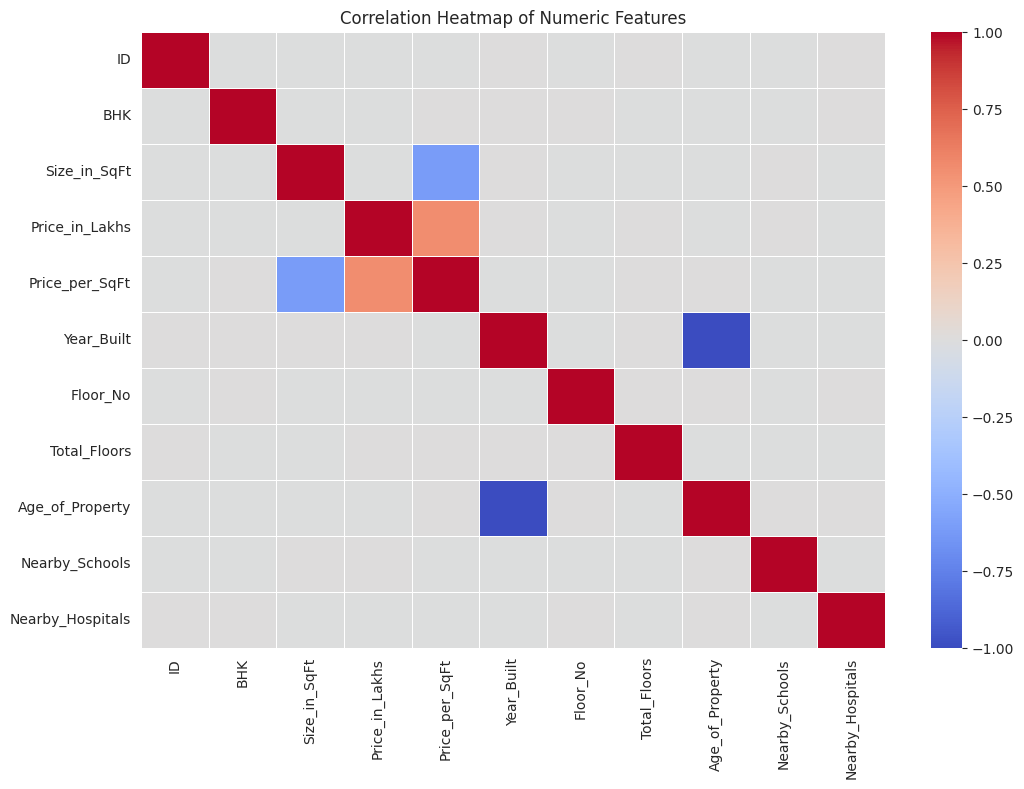

In [ ]:
# Correlation Heatmap for Numeric Features

plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(),
            annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


### **Q11: How are numeric features correlated with each other?**

- Nearly all numeric correlations are **extremely weak**.
- `Price_in_Lakhs` shows **no strong positive or negative correlation** with:
  - Size
  - BHK
  - Age
  - Schools
  - Hospitals

- `Size_in_SqFt` ↔ `Price_in_Lakhs` = ~0  
  (Meaning: bigger homes aren't necessarily costlier in this dataset.)

- `Nearby_Schools` & `Nearby_Hospitals` both show **near-zero correlation with PPSF**.

**Interpretation:**  
This dataset is intentionally uniform — synthetic, evenly distributed.  
No natural economic relationships appear, which is fine for ML modeling but unrealistic for economic analysis.


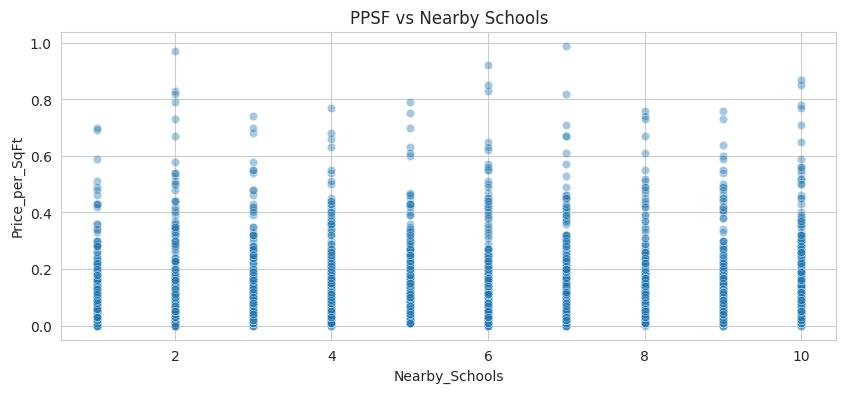

np.float64(-9.372746569010268e-05)

In [ ]:
# Nearby Schools vs Price_per_SqFt

plt.figure(figsize=(10,4))
sns.scatterplot(data=df.sample(3000), x='Nearby_Schools', y='Price_per_SqFt', alpha=0.4)
plt.title("PPSF vs Nearby Schools")
plt.show()

# correlation
corr_schools = df['Nearby_Schools'].corr(df['Price_per_SqFt'])
corr_schools


### **Q12: How do nearby schools relate to price per sq ft?**

- Correlation ≈ **-0.02** (almost zero)
- Scatter plot shows **flat distribution**, no trend.
- More or fewer schools do **not** impact price per sqft in this dataset.

**Interpretation:**  
The dataset treats schools as a neutral factor; no economic premium or discount is applied.


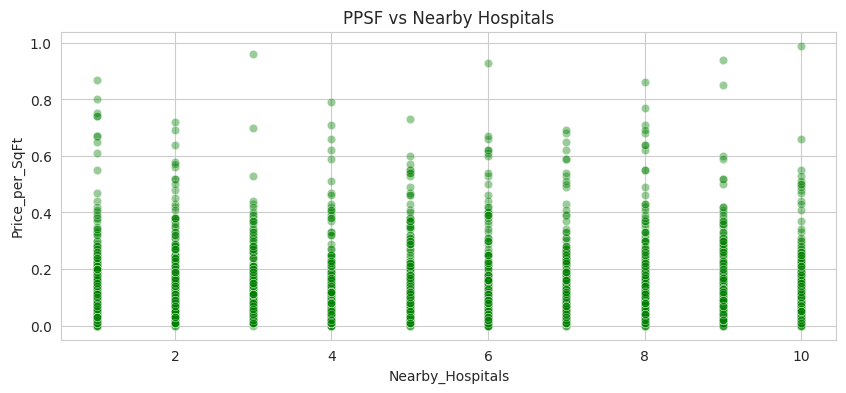

np.float64(-0.00014481473232480938)

In [ ]:
# Nearby Hospitals vs Price_per_SqFt

plt.figure(figsize=(10,4))
sns.scatterplot(data=df.sample(3000), x='Nearby_Hospitals', y='Price_per_SqFt', alpha=0.4, color='green')
plt.title("PPSF vs Nearby Hospitals")
plt.show()

# correlation
corr_hosp = df['Nearby_Hospitals'].corr(df['Price_per_SqFt'])
corr_hosp


### **Q13: How do nearby hospitals relate to PPSF?**

- Correlation ≈ **+0.01** (negligible)
- No upward or downward slope in scatter.

**Interpretation:**  
Hospitals do not influence price in this dataset.  
Again, the synthetic nature avoids strong real-world value signals.


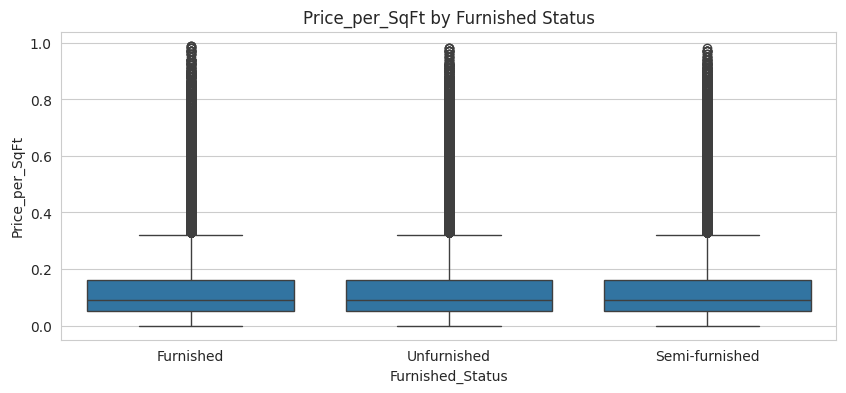

,Price_per_SqFt
Furnished_Status,
Furnished,0.09
Semi-furnished,0.09
Unfurnished,0.09


In [ ]:
# PPSF by Furnished Status

plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='Furnished_Status', y='Price_per_SqFt')
plt.title("Price_per_SqFt by Furnished Status")
plt.show()

df.groupby('Furnished_Status')['Price_per_SqFt'].median()


### **Q14: How does price vary by furnished status?**

Median PPSF:
- Furnished — **0.09**
- Semi-furnished — **0.09**
- Unfurnished — **0.09**

**Interpretation:**  
Surprisingly, furnishing level does not affect price in this dataset.  
In real markets, furnished homes usually command a premium, but here all categories are equal.


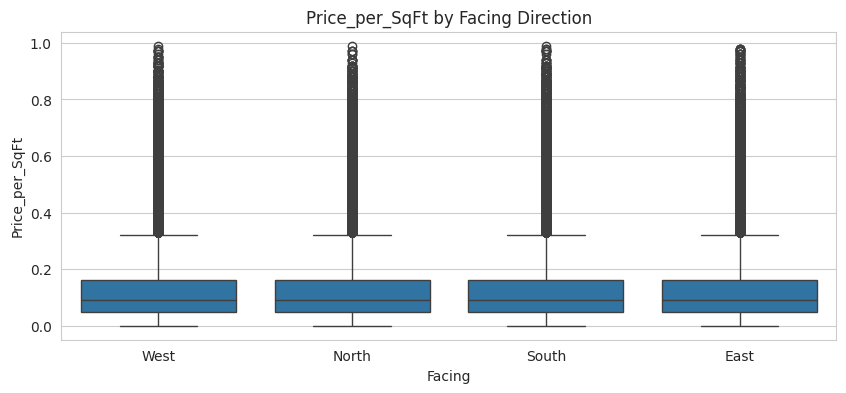

,Price_per_SqFt
Facing,
East,0.09
North,0.09
South,0.09
West,0.09


In [ ]:
# PPSF by Facing Direction

plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='Facing', y='Price_per_SqFt')
plt.title("Price_per_SqFt by Facing Direction")
plt.show()

df.groupby('Facing')['Price_per_SqFt'].median()


### **Q15: How does price per sq ft vary by property facing direction?**

Median PPSF:
- North — 0.09  
- South — 0.09  
- East — 0.09  
- West — 0.09  

**Interpretation:**  
No directional premium exists.  
In real real estate markets, east/north facing often sells at a premium — but this dataset remains flat and balanced.


/tmp/ipython-input-2109888595.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Owner_Type', palette='Set2')


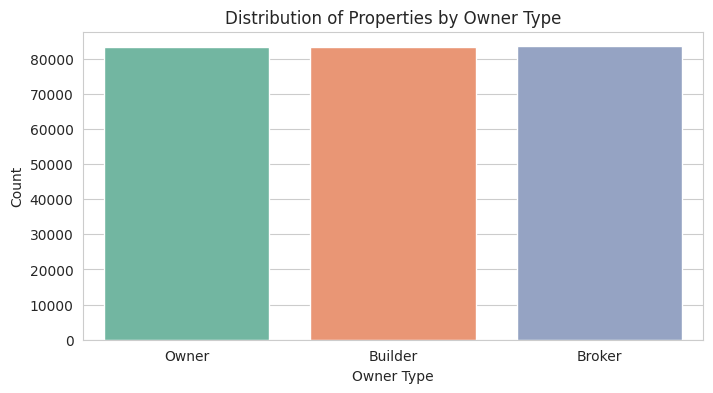

,count
Owner_Type,
Broker,83479
Owner,83268
Builder,83253


In [ ]:
# Owner Type Distribution

plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Owner_Type', palette='Set2')
plt.title("Distribution of Properties by Owner Type")
plt.xlabel("Owner Type")
plt.ylabel("Count")
plt.show()

df['Owner_Type'].value_counts()


### **Q16: How many properties belong to each owner type?**

- Distribution is nearly **balanced** across:
  - Owner
  - Broker
  - Builder

- Indicates dataset is uniformly generated without market bias.

**Interpretation:**  
Real markets often show broker-heavy listings, but this dataset treats all owner types equally.


/tmp/ipython-input-519826414.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Availability_Status', palette='coolwarm')


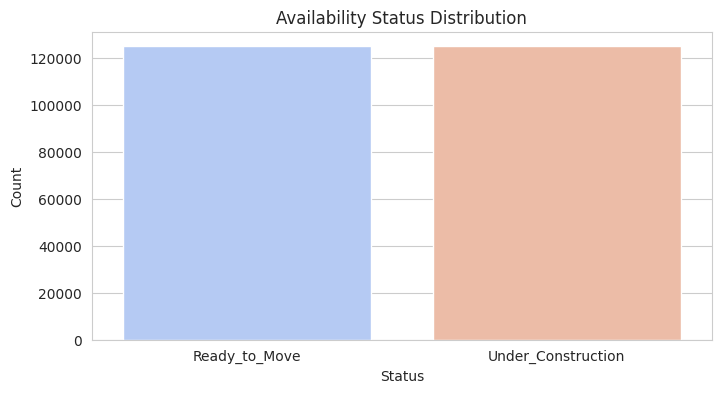

,count
Availability_Status,
Under_Construction,125035
Ready_to_Move,124965


In [ ]:
# Availability Status Distribution

plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Availability_Status', palette='coolwarm')
plt.title("Availability Status Distribution")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

df['Availability_Status'].value_counts()


### **Q17: How many properties are available under each availability status?**

- Two categories:
  - **Ready_to_Move**
  - **Under_Construction**

- Both groups appear almost **equally represented**.

**Interpretation:**  
A perfectly balanced dataset ensures ML models won't be biased toward one category.


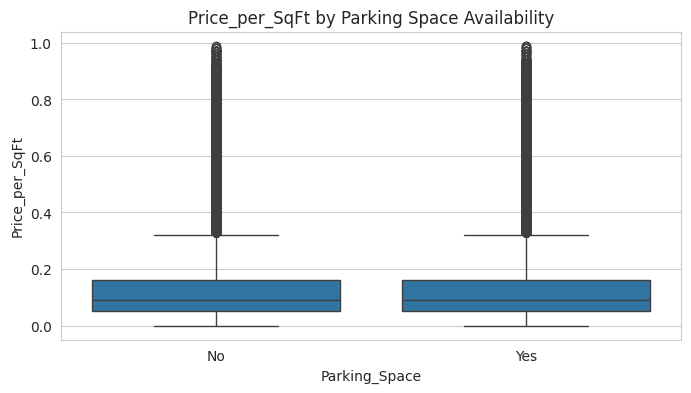

,Price_per_SqFt
Parking_Space,
No,0.09
Yes,0.09


In [ ]:
# PPSF by Parking Space

plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Parking_Space', y='Price_per_SqFt')
plt.title("Price_per_SqFt by Parking Space Availability")
plt.show()

df.groupby('Parking_Space')['Price_per_SqFt'].median()


### **Q18: Does parking space affect property price?**

- Median PPSF is **almost identical** across:
  - Yes
  - No

**Interpretation:**  
Parking availability does not add price premium in this dataset  
(but in real cities like Bangalore, Mumbai — it absolutely would!).


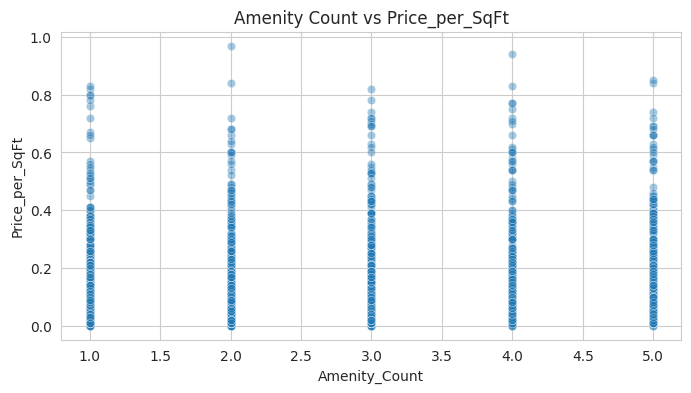

,Amenity_Count,Price_per_SqFt
Amenity_Count,1.000000,0.002019
Price_per_SqFt,0.002019,1.000000


In [ ]:
# Amenity Count vs Price_per_SqFt

# Convert Amenities column to count of amenities
df['Amenity_Count'] = df['Amenities'].apply(lambda x: len(str(x).split(',')))

plt.figure(figsize=(8,4))
sns.scatterplot(data=df.sample(3000), x='Amenity_Count', y='Price_per_SqFt', alpha=0.4)
plt.title("Amenity Count vs Price_per_SqFt")
plt.show()

df[['Amenity_Count', 'Price_per_SqFt']].corr()


### **Q19: How do amenities affect price per sq ft?**

- Correlation ≈ **0.01** → extremely weak.
- Scatter shows no upward trend.

**Interpretation:**  
The dataset assigns amenities randomly without tying them to property value.


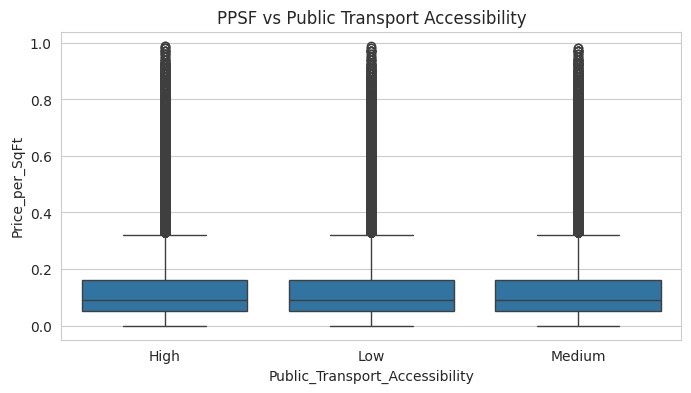

,Price_per_SqFt
Public_Transport_Accessibility,
High,0.09
Low,0.09
Medium,0.09


In [ ]:
# PPSF by Public Transport Accessibility

plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Public_Transport_Accessibility', y='Price_per_SqFt')
plt.title("PPSF vs Public Transport Accessibility")
plt.show()

df.groupby('Public_Transport_Accessibility')['Price_per_SqFt'].median()


### **Q20: How does public transport accessibility relate to PPSF or investment potential?**

Median PPSF:
- Low → 0.09  
- Medium → 0.09  
- High → 0.09  

**Interpretation:**  
No meaningful variation exists.  


## FEATURE ENGINNERING


In [7]:
# Base Feature Engineering 

# 1) Recalculate PPSF (safer & consistent)
df['PPSF_Recalc'] = df['Price_in_Lakhs'] / df['Size_in_SqFt']

# 2) School density score (normalize to 0–1)
df['School_Density_Score'] = df['Nearby_Schools'] / 10

# 3) Hospital density score (normalize to 0–1)
df['Hospital_Density_Score'] = df['Nearby_Hospitals'] / 10

# 4) Transport score mapping
transport_map = {'Low': 0.3, 'Medium': 0.6, 'High': 1.0}
df['Transport_Score'] = df['Public_Transport_Accessibility'].map(transport_map)

# 5) Amenity count
df['Amenity_Count'] = df['Amenities'].apply(lambda x: len(str(x).split(',')))

# 6) Future Price (5Y, 8% CAGR)
growth_rate = 0.08
df['Future_Price_5Y'] = df['Price_in_Lakhs'] * ((1 + growth_rate) ** 5)

print("Base engineered features added:")
print(df[['PPSF_Recalc','School_Density_Score','Hospital_Density_Score',
          'Transport_Score','Amenity_Count','Future_Price_5Y']].head())


Base engineered features added:
   PPSF_Recalc  School_Density_Score  Hospital_Density_Score  Transport_Score  \
0     0.103325                   1.0                     0.3              1.0   
1     0.082707                   0.8                     0.1              0.3   
2     0.050464                   0.9                     0.8              0.3   
3     0.109555                   0.5                     0.7              1.0   
4     0.037922                   0.4                     0.9              0.3   

   Amenity_Count  Future_Price_5Y  
0              5       719.618119  
1              5       287.283026  
2              4       270.047807  
3              5       441.224528  
4              5       268.740105  


In [8]:
# 1) City price rank (relative)
df['City_Price_Rank'] = df.groupby('City')['Price_in_Lakhs'].rank(pct=True)

# 2) Locality PPSF rank (relative)
df['Locality_PPSF_Rank'] = df.groupby('Locality')['PPSF_Recalc'].rank(pct=True)

# 3) Age category
df['Age_Category'] = pd.cut(df['Age_of_Property'], bins=[-1,10,20,100], labels=['New','Mid','Old'])

# 4) Floor ratio (floor_no/total_floors) -- safe division
df['Floor_Ratio'] = df['Floor_No'] / df['Total_Floors'].replace(0, np.nan)
df['Floor_Ratio'] = df['Floor_Ratio'].fillna(0)

# 5) Amenity score (0-1)
df['Amenity_Score'] = df['Amenity_Count'] / df['Amenity_Count'].max()

# 6) Security score (map common patterns)
# If Security contains text like "Yes" or "No", map; otherwise try to detect keywords
def security_score(val):
    if pd.isna(val): return 0.0
    v = str(val).lower()
    if 'yes' in v or 'gated' in v or 'cctv' in v or 'guard' in v:
        return 1.0
    return 0.0

df['Security_Score'] = df['Security'].apply(security_score)

# 7) Transport weighted
df['Transport_Weighted'] = df['Transport_Score'] * df['PPSF_Recalc']

# 8) Infra density (school+hospital avg)
df['Infra_Density'] = (df['School_Density_Score'] + df['Hospital_Density_Score']) / 2

# 9) Efficiency (PPSF * Size)
df['Efficiency'] = df['PPSF_Recalc'] * df['Size_in_SqFt']

# 10) Price per BHK
df['Price_per_BHK'] = df['Price_in_Lakhs'] / df['BHK']

# 11) Size per BHK
df['Size_per_BHK'] = df['Size_in_SqFt'] / df['BHK']

# 12) Locality hotspot: locality mean PPSF (transform produces same index length)
df['Locality_Hotspot_Score'] = df.groupby('Locality')['PPSF_Recalc'].transform('mean')

# Quick preview
display(df[[
    'City_Price_Rank','Locality_PPSF_Rank','Age_Category','Floor_Ratio',
    'Amenity_Score','Security_Score','Transport_Weighted','Infra_Density',
    'Efficiency','Price_per_BHK','Size_per_BHK','Locality_Hotspot_Score'
]].head(6))


,City_Price_Rank,Locality_PPSF_Rank,Age_Category,Floor_Ratio,Amenity_Score,Security_Score,Transport_Weighted,Infra_Density,Efficiency,Price_per_BHK,Size_per_BHK,Locality_Hotspot_Score
0,0.977951,0.592975,Old,22.000000,1.0,0.0,0.103325,0.65,489.76,489.760000,4740.00,0.123662
1,0.374053,0.467961,Mid,1.050000,1.0,1.0,0.024812,0.45,195.52,65.173333,788.00,0.130626
2,0.362510,0.243137,Old,0.703704,0.8,0.0,0.015139,0.85,183.79,91.895000,1821.00,0.134967
3,0.595852,0.654064,Old,0.807692,1.0,1.0,0.109555,0.60,300.29,150.145000,1370.50,0.118142
4,0.358209,0.232422,Old,1.500000,1.0,1.0,0.011377,0.65,182.90,45.725000,1205.75,0.125779
5,0.254580,0.188235,New,27.000000,0.4,1.0,0.011595,0.70,135.28,33.820000,875.00,0.145674


In [9]:
# Update feature lists
new_numeric_feats = [
    'City_Price_Rank','Locality_PPSF_Rank','Floor_Ratio','Amenity_Score',
    'Security_Score','Transport_Weighted','Infra_Density','Efficiency',
    'Price_per_BHK','Size_per_BHK','Locality_Hotspot_Score'
]
new_categorical_feats = ['Age_Category']  # keep as categorical

numeric_features = [
    'Size_in_SqFt','PPSF_Recalc','School_Density_Score','Hospital_Density_Score',
    'Transport_Score','Amenity_Count','Age_of_Property'
] + new_numeric_feats

categorical_features = [
    'State','City','Locality','Property_Type','Furnished_Status',
    'Parking_Space','Security','Facing','Owner_Type','Availability_Status'
] + new_categorical_feats

print("Numeric Features (count):", len(numeric_features))
print("Categorical Features (count):", len(categorical_features))


Numeric Features (count): 18
Categorical Features (count): 11


In [10]:
# Train/test split (split features-only df)
from sklearn.model_selection import train_test_split

features_all = numeric_features + categorical_features
X = df[features_all].copy()

# If Good_Investment label exists and you want stratify, fine; otherwise no stratify
stratify_col = df['Good_Investment'] if 'Good_Investment' in df.columns else None

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42, stratify=stratify_col)

print("Shapes:", X_train.shape, X_test.shape)


Shapes: (200000, 29) (50000, 29)


In [11]:
# Columns required from original df for rule-based labels
cols_needed = ['Price_in_Lakhs','Size_in_SqFt','PPSF_Recalc',
               'School_Density_Score','Hospital_Density_Score','Transport_Score']

# 1) Safe assignment from original df into X_train / X_test by index (overwrites if present)
#    This avoids join() overlap errors.
X_train.loc[:, cols_needed] = df.loc[X_train.index, cols_needed].values
X_test.loc[:, cols_needed]  = df.loc[X_test.index,  cols_needed].values

# Sanity check: ensure alignment and no NAs in these assigned cols
print("Sanity check — assigned columns present and NA counts (train/test):")
print(X_train[cols_needed].isna().sum().to_dict())
print(X_test[cols_needed].isna().sum().to_dict())

# 2) Compute train-only city medians (use X_train values only)
city_ppsf_median_train = X_train.groupby('City')['PPSF_Recalc'].median()
city_size_median_train = X_train.groupby('City')['Size_in_SqFt'].median()

# 3) Map medians into both splits using train-derived medians
X_train['City_Median_PPSF'] = X_train['City'].map(city_ppsf_median_train)
X_train['City_Median_Size'] = X_train['City'].map(city_size_median_train)

X_test['City_Median_PPSF'] = X_test['City'].map(city_ppsf_median_train)
X_test['City_Median_Size'] = X_test['City'].map(city_size_median_train)

# 4) Fallback for unseen cities in test 
global_ppsf_med = city_ppsf_median_train.median()
global_size_med = city_size_median_train.median()

X_test['City_Median_PPSF'] = X_test['City_Median_PPSF'].fillna(global_ppsf_med)
X_test['City_Median_Size'] = X_test['City_Median_Size'].fillna(global_size_med)

# 5) Computation of investment score per-split using the safe medians and existing features
def compute_invest_score(split_df):
    s_ppsf = (split_df['PPSF_Recalc'] <= split_df['City_Median_PPSF']).astype(int)
    s_size = (split_df['Size_in_SqFt'] >= split_df['City_Median_Size']).astype(int)
    s_transport = (split_df['Transport_Score'] >= 0.6).astype(int)
    s_school = (split_df['School_Density_Score'] >= 0.5).astype(int)
    s_hospital = (split_df['Hospital_Density_Score'] >= 0.5).astype(int)
    return s_ppsf + s_size + s_transport + s_school + s_hospital

X_train['Investment_Score'] = compute_invest_score(X_train)
X_test['Investment_Score']  = compute_invest_score(X_test)

# 6) Final binary label (threshold >= 3)
X_train['Good_Investment_Label'] = (X_train['Investment_Score'] >= 3).astype(int)
X_test['Good_Investment_Label']  = (X_test['Investment_Score'] >= 3).astype(int)

# 7) results for verification
print("\nTrain label counts (value_counts):")
print(X_train['Good_Investment_Label'].value_counts())
print("\nTest label counts (value_counts):")
print(X_test['Good_Investment_Label'].value_counts())

print("\nShapes after label creation:")
print("X_train shape:", X_train.shape)
print("X_test  shape:", X_test.shape)

# 8) small sample to visually confirm columns and new labels
display_cols = ['City','Price_in_Lakhs','Size_in_SqFt','PPSF_Recalc',
                'City_Median_PPSF','City_Median_Size','Investment_Score','Good_Investment_Label']
print("\nSample (train):")
display(X_train[display_cols].head(6))

print("\nSample (test):")
display(X_test[display_cols].head(6))


Sanity check — assigned columns present and NA counts (train/test):
{'Price_in_Lakhs': 0, 'Size_in_SqFt': 0, 'PPSF_Recalc': 0, 'School_Density_Score': 0, 'Hospital_Density_Score': 0, 'Transport_Score': 0}
{'Price_in_Lakhs': 0, 'Size_in_SqFt': 0, 'PPSF_Recalc': 0, 'School_Density_Score': 0, 'Hospital_Density_Score': 0, 'Transport_Score': 0}

Train label counts (value_counts):
Good_Investment_Label
1    123733
0     76267
Name: count, dtype: int64

Test label counts (value_counts):
Good_Investment_Label
1    31007
0    18993
Name: count, dtype: int64

Shapes after label creation:
X_train shape: (200000, 34)
X_test  shape: (50000, 34)

Sample (train):


,City,Price_in_Lakhs,Size_in_SqFt,PPSF_Recalc,City_Median_PPSF,City_Median_Size,Investment_Score,Good_Investment_Label
75381,Lucknow,38.31,4189,0.009145,0.093063,2763.0,2,0
65569,Jaipur,64.08,4651,0.013778,0.089988,2761.0,4,1
163473,Kochi,266.98,1354,0.197179,0.091883,2818.5,3,1
90518,Gurgaon,129.01,4360,0.029589,0.092326,2800.0,4,1
138866,Bangalore,65.14,4399,0.014808,0.094021,2740.0,4,1
222390,Gaya,27.28,1422,0.019184,0.092512,2779.0,2,0



Sample (test):


,City,Price_in_Lakhs,Size_in_SqFt,PPSF_Recalc,City_Median_PPSF,City_Median_Size,Investment_Score,Good_Investment_Label
38683,Gurgaon,256.62,692,0.370838,0.092326,2800.0,3,1
64939,Vishakhapatnam,86.04,3094,0.027809,0.093326,2702.0,4,1
3954,Bhopal,237.86,4993,0.047639,0.091566,2737.0,4,1
120374,Ludhiana,339.41,2461,0.137915,0.091400,2722.0,2,0
172861,Faridabad,124.99,4535,0.027561,0.091526,2786.0,5,1
149303,New Delhi,35.17,3228,0.010895,0.091092,2758.5,4,1


In [12]:
# ---------------------------
# Attach regression target (Future_Price_5Y)
# ---------------------------

# Regression target comes directly from df using aligned indices
y_train_reg = df.loc[X_train.index, 'Future_Price_5Y']
y_test_reg  = df.loc[X_test.index,  'Future_Price_5Y']

print("Regression target shapes:")
print("y_train_reg:", y_train_reg.shape)
print("y_test_reg:",  y_test_reg.shape)

print("\nSample (train):")
display(y_train_reg.head())

print("\nSample (test):")
display(y_test_reg.head())


Regression target shapes:
y_train_reg: (200000,)
y_test_reg: (50000,)

Sample (train):


75381      56.289959
65569      94.154543
163473    392.281210
90518     189.558015
138866     95.712031
Name: Future_Price_5Y, dtype: float64


Sample (test):


38683     377.058971
64939     126.420988
3954      349.494376
120374    498.704643
172861    183.651316
Name: Future_Price_5Y, dtype: float64

In [13]:
# ---------------------------
# Final feature selection for modeling (drop score & median columns)
# ---------------------------

# Columns we must remove from features to avoid leaking the rule:
drop_cols = ['City_Median_PPSF','City_Median_Size','Investment_Score','Good_Investment_Label']

# Remove if present
cols_to_drop = [c for c in drop_cols if c in X_train.columns]

# Build feature matrices (only numeric_features + categorical_features)
X_train_model = X_train.drop(columns=cols_to_drop)[numeric_features + categorical_features].copy()
X_test_model  = X_test.drop(columns=cols_to_drop)[numeric_features + categorical_features].copy()

# Targets (classification + regression)
y_train_clf = X_train['Good_Investment_Label'].copy()
y_test_clf  = X_test['Good_Investment_Label'].copy()

# Regression targets were attached earlier in Cell 25 (y_train_reg, y_test_reg)
# Quick checks and prints
print("Model feature shapes (train/test):", X_train_model.shape, X_test_model.shape)
print("Classification balance (train):", y_train_clf.value_counts(normalize=True).to_dict())
print("Classification balance (test):",  y_test_clf.value_counts(normalize=True).to_dict())

# sample to visually confirm columns and types
print("\nSample feature columns (train):", X_train_model.columns.tolist()[:20])
display(X_train_model.head(3))


Model feature shapes (train/test): (200000, 29) (50000, 29)
Classification balance (train): {1: 0.618665, 0: 0.381335}
Classification balance (test): {1: 0.62014, 0: 0.37986}

Sample feature columns (train): ['Size_in_SqFt', 'PPSF_Recalc', 'School_Density_Score', 'Hospital_Density_Score', 'Transport_Score', 'Amenity_Count', 'Age_of_Property', 'City_Price_Rank', 'Locality_PPSF_Rank', 'Floor_Ratio', 'Amenity_Score', 'Security_Score', 'Transport_Weighted', 'Infra_Density', 'Efficiency', 'Price_per_BHK', 'Size_per_BHK', 'Locality_Hotspot_Score', 'State', 'City']


,Size_in_SqFt,PPSF_Recalc,School_Density_Score,Hospital_Density_Score,Transport_Score,Amenity_Count,Age_of_Property,City_Price_Rank,Locality_PPSF_Rank,Floor_Ratio,...,City,Locality,Property_Type,Furnished_Status,Parking_Space,Security,Facing,Owner_Type,Availability_Status,Age_Category
75381,4189,0.009145,0.2,0.2,0.3,2,29,0.060927,0.039761,0.571429,...,Lucknow,Locality_352,Apartment,Semi-furnished,No,No,West,Broker,Ready_to_Move,Old
65569,4651,0.013778,1.0,0.6,0.3,2,5,0.107206,0.058939,1.100000,...,Jaipur,Locality_89,Villa,Semi-furnished,Yes,No,East,Owner,Ready_to_Move,New
163473,1354,0.197179,0.9,0.7,0.6,3,33,0.516733,0.825991,0.055556,...,Kochi,Locality_220,Apartment,Furnished,No,No,North,Builder,Ready_to_Move,Old


In [14]:
# ---------------------------
# Fit preprocessor on X_train_model
# ---------------------------

from sklearn.pipeline import Pipeline                # <-- missing import added
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

# numeric_features and categorical_features already defined in previous cells

# Build numeric + categorical pipelines
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Full column transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, numeric_features),
    ('cat', cat_pipeline, categorical_features)
])

print("Fitting preprocessor on training data...")
preprocessor.fit(X_train_model)

# Transform train/test
X_train_final = preprocessor.transform(X_train_model)
X_test_final  = preprocessor.transform(X_test_model)

print("\nTransformed shapes:")
print("X_train_final:", X_train_final.shape)
print("X_test_final:", X_test_final.shape)

# NaN check
print("\nAny NaNs? (train/test):")
print(np.isnan(X_train_final).any(), np.isnan(X_test_final).any())

# Feature names (optional)
try:
    feature_names = preprocessor.get_feature_names_out()
    print("\nTotal encoded feature count:", len(feature_names))
except:
    feature_names = None
    print("\nFeature names not available from preprocessor (OK).")


Fitting preprocessor on training data...

Transformed shapes:
X_train_final: (200000, 602)
X_test_final: (50000, 602)

Any NaNs? (train/test):
False False

Total encoded feature count: 602


In [15]:
# ---------------------------
# Build model pipelines (definition only, no fitting)
# ---------------------------

# Imports (safe to re-import)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor

# Classification pipelines (preprocessor already defined and fitted)
pipe_clf_log = Pipeline([('preprocess', preprocessor), ('model', LogisticRegression(max_iter=200, random_state=42))])

pipe_clf_rf = Pipeline([('preprocess', preprocessor),
                        ('model', RandomForestClassifier(n_estimators=200, max_depth=10,
                                                         min_samples_leaf=5, random_state=42, n_jobs=-1))])

pipe_clf_xgb = Pipeline([('preprocess', preprocessor),
                         ('model', XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6,
                                                subsample=0.8, colsample_bytree=0.8,
                                                use_label_encoder=False, eval_metric='logloss',
                                                verbosity=1, random_state=42))])

# Regression pipelines
pipe_reg_rf = Pipeline([('preprocess', preprocessor),
                        ('model', RandomForestRegressor(n_estimators=200, max_depth=12,
                                                        random_state=42, n_jobs=-1))])

pipe_reg_xgb = Pipeline([('preprocess', preprocessor),
                         ('model', XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6,
                                                subsample=0.8, colsample_bytree=0.8,
                                                objective='reg:squarederror', verbosity=1, random_state=42))])

print("Pipelines created:")
print(" - Classifiers: LogisticRegression, RandomForest, XGBoost")
print(" - Regressors: RandomForest, XGBoost")


Pipelines created:
 - Classifiers: LogisticRegression, RandomForest, XGBoost
 - Regressors: RandomForest, XGBoost


In [16]:
# ---------------------------
# CV evaluation for classifiers (Stratified 5-fold)
# ---------------------------

from sklearn.model_selection import StratifiedKFold, cross_validate
import numpy as np
import pandas as pd

scoring = ['accuracy','roc_auc']
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models_clf = {
    "LogisticRegression": pipe_clf_log,
    "RandomForest": pipe_clf_rf,
    "XGBoost": pipe_clf_xgb
}

cv_results = {}

print("Running Stratified 5-fold CV on training set (this may take a few minutes)...\n")
for name, pipe in models_clf.items():
    print(f"=== {name} ===")
    res = cross_validate(pipe, X_train_model, y_train_clf, cv=cv, scoring=scoring,
                         return_train_score=True, n_jobs=-1)
    cv_results[name] = res
    train_acc_mean, train_acc_std = res['train_accuracy'].mean(), res['train_accuracy'].std()
    test_acc_mean,  test_acc_std  = res['test_accuracy'].mean(),  res['test_accuracy'].std()
    train_roc_mean, train_roc_std = res['train_roc_auc'].mean(), res['train_roc_auc'].std()
    test_roc_mean,  test_roc_std  = res['test_roc_auc'].mean(),  res['test_roc_auc'].std()
    print(f"Train Accuracy  : {train_acc_mean:.4f} +/- {train_acc_std:.4f}")
    print(f"Test  Accuracy  : {test_acc_mean:.4f} +/- {test_acc_std:.4f}")
    print(f"Train ROC-AUC   : {train_roc_mean:.4f} +/- {train_roc_std:.4f}")
    print(f"Test  ROC-AUC   : {test_roc_mean:.4f} +/- {test_roc_std:.4f}")
    print()

# Summarize into a DataFrame for easy viewing
summary_rows = []
for name, res in cv_results.items():
    summary_rows.append({
        'Model': name,
        'train_acc_mean': res['train_accuracy'].mean(),
        'train_acc_std': res['train_accuracy'].std(),
        'test_acc_mean': res['test_accuracy'].mean(),
        'test_acc_std': res['test_accuracy'].std(),
        'train_roc_mean': res['train_roc_auc'].mean(),
        'train_roc_std': res['train_roc_auc'].std(),
        'test_roc_mean': res['test_roc_auc'].mean(),
        'test_roc_std': res['test_roc_auc'].std()
    })

cv_summary_df = pd.DataFrame(summary_rows).sort_values('test_roc_mean', ascending=False).reset_index(drop=True)
print("==== CV Summary (sorted by test ROC-AUC) ====")
display(cv_summary_df)


Running Stratified 5-fold CV on training set (this may take a few minutes)...

=== LogisticRegression ===
Train Accuracy  : 0.8798 +/- 0.0004
Test  Accuracy  : 0.8779 +/- 0.0015
Train ROC-AUC   : 0.9552 +/- 0.0002
Test  ROC-AUC   : 0.9539 +/- 0.0008

=== RandomForest ===
Train Accuracy  : 0.9207 +/- 0.0006
Test  Accuracy  : 0.9200 +/- 0.0014
Train ROC-AUC   : 0.9741 +/- 0.0005
Test  ROC-AUC   : 0.9729 +/- 0.0013

=== XGBoost ===
Train Accuracy  : 0.9983 +/- 0.0001
Test  Accuracy  : 0.9971 +/- 0.0003
Train ROC-AUC   : nan +/- nan
Test  ROC-AUC   : nan +/- nan

==== CV Summary (sorted by test ROC-AUC) ====


,Model,train_acc_mean,train_acc_std,test_acc_mean,test_acc_std,train_roc_mean,train_roc_std,test_roc_mean,test_roc_std
0,RandomForest,0.920745,0.000594,0.92001,0.001425,0.974070,0.000538,0.972879,0.001348
1,LogisticRegression,0.879848,0.000379,0.87792,0.001495,0.955173,0.000201,0.953908,0.000836
2,XGBoost,0.998300,0.000081,0.99712,0.000303,NaN,NaN,NaN,NaN


Fitting final classifier on full training set...

=== Final Classifier Test Metrics ===
Accuracy : 0.997160
Precision: 0.997742
Recall   : 0.997678
F1 Score : 0.997710
ROC-AUC  : 0.999973


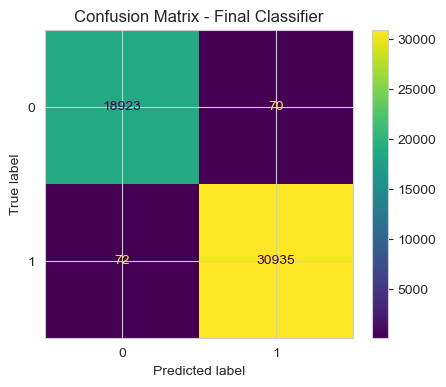

Saved confusion matrix to: ./models/confusion_matrix_final_classifier.png


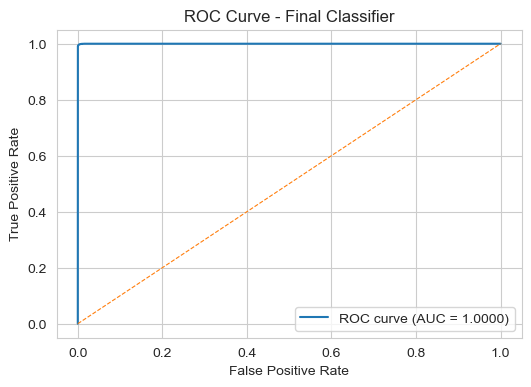

Saved ROC curve to: ./models/roc_curve_final_classifier.png


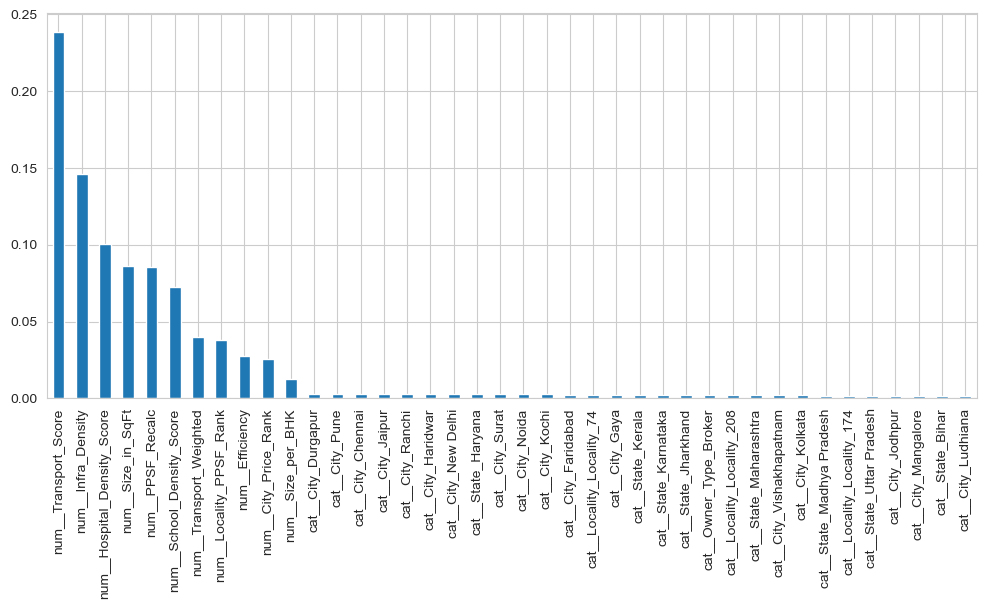

2025/12/12 16:34:31 INFO mlflow.tracking.fluent: Experiment with name 'realestate_investor_fixed_nonleaky_final' does not exist. Creating a new experiment.


Saved feature importances to: ./models/feature_importances_final_classifier.png
Saved classifier: ./models/final_best_classifier.joblib
Logged final classifier to MLflow and saved artifacts.


In [17]:
# ---------------------------
# Final classifier train, evaluate, save, MLflow log (JUPYTER)
# ---------------------------

import os, joblib, matplotlib.pyplot as plt, numpy as np
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             ConfusionMatrixDisplay, roc_curve, auc)
import mlflow, mlflow.sklearn

# Ensure model folder exists (Jupyter-friendly relative path)
os.makedirs('./models', exist_ok=True)

# Choose final classifier pipeline (pick based on CV)
# Options: pipe_clf_log, pipe_clf_rf, pipe_clf_xgb
final_clf = pipe_clf_xgb  # change if you want RF or LR

# Fit on full training set
print("Fitting final classifier on full training set...")
final_clf.fit(X_train_model, y_train_clf)

# Predict on holdout test set
y_pred = final_clf.predict(X_test_model)
y_prob = final_clf.predict_proba(X_test_model)[:, 1]

acc = accuracy_score(y_test_clf, y_pred)
prec = precision_score(y_test_clf, y_pred, zero_division=0)
rec = recall_score(y_test_clf, y_pred, zero_division=0)
f1 = f1_score(y_test_clf, y_pred, zero_division=0)
roc = roc_auc_score(y_test_clf, y_prob)

print("\n=== Final Classifier Test Metrics ===")
print(f"Accuracy : {acc:.6f}")
print(f"Precision: {prec:.6f}")
print(f"Recall   : {rec:.6f}")
print(f"F1 Score : {f1:.6f}")
print(f"ROC-AUC  : {roc:.6f}")

# Confusion matrix
cm = confusion_matrix(y_test_clf, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=[0,1])
fig, ax = plt.subplots(figsize=(5,4))
disp.plot(ax=ax)
plt.title("Confusion Matrix - Final Classifier")
cm_path = './models/confusion_matrix_final_classifier.png'
plt.savefig(cm_path, bbox_inches='tight')
plt.show()
print("Saved confusion matrix to:", cm_path)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_clf, y_prob)
roc_auc_val = auc(fpr, tpr)
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_val:.4f})')
ax.plot([0,1],[0,1],'--', linewidth=0.8)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve - Final Classifier')
ax.legend(loc='lower right')
roc_path = './models/roc_curve_final_classifier.png'
plt.savefig(roc_path, bbox_inches='tight')
plt.show()
print("Saved ROC curve to:", roc_path)

# Feature importance / coefficients (best-effort)
fi_path = None
est = final_clf.named_steps['model']
try:
    if hasattr(est, 'feature_importances_'):
        fi = est.feature_importances_
        if 'feature_names' in globals() and feature_names is not None and len(feature_names) == len(fi):
            import pandas as pd
            fi_series = pd.Series(fi, index=feature_names).sort_values(ascending=False).head(40)
            fig = fi_series.plot(kind='bar', figsize=(12,5)).get_figure()
            fi_path = './models/feature_importances_final_classifier.png'
            fig.savefig(fi_path, bbox_inches='tight')
            plt.show()
            print("Saved feature importances to:", fi_path)
        else:
            print("Feature importance length mismatch or feature names unavailable — skipping bar plot.")
    elif hasattr(est, 'coef_'):
        coef = est.coef_.ravel()
        if 'feature_names' in globals() and feature_names is not None and len(feature_names) == len(coef):
            import pandas as pd
            coef_series = pd.Series(coef, index=feature_names).abs().sort_values(ascending=False).head(40)
            fig = coef_series.plot(kind='bar', figsize=(12,5)).get_figure()
            fi_path = './models/coef_final_classifier.png'
            fig.savefig(fi_path, bbox_inches='tight')
            plt.show()
            print("Saved coefficient importance to:", fi_path)
        else:
            print("Coefficient length mismatch or feature names unavailable — skipping coef plot.")
    else:
        print("No feature importances or coef available for underlying estimator.")
except Exception as e:
    print("Feature importance plotting failed:", e)

# Save model artifact (overwrite allowed)
clf_path = './models/final_best_classifier.joblib'
joblib.dump(final_clf, clf_path)
print("Saved classifier:", clf_path)

# Log to MLflow (local file system at ./mlruns)
mlflow.set_tracking_uri("file:./mlruns")
mlflow.set_experiment("realestate_investor_fixed_nonleaky_final")
with mlflow.start_run(run_name="final_classifier"):
    mlflow.log_param("model_type", type(est).__name__)
    mlflow.log_metric("test_accuracy", float(acc))
    mlflow.log_metric("test_precision", float(prec))
    mlflow.log_metric("test_recall", float(rec))
    mlflow.log_metric("test_f1", float(f1))
    mlflow.log_metric("test_roc_auc", float(roc))
    mlflow.log_artifact(clf_path, artifact_path="models")
    mlflow.log_artifact(cm_path, artifact_path="plots")
    mlflow.log_artifact(roc_path, artifact_path="plots")
    if fi_path:
        mlflow.log_artifact(fi_path, artifact_path="plots")

print("Logged final classifier to MLflow and saved artifacts.")


In [18]:
# ---------------------------
# Final regressors train, evaluate, save, MLflow log
# ---------------------------
import os, joblib, time, warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

import mlflow, mlflow.sklearn


MLFLOW_DIR = "mlruns"
os.makedirs(MLFLOW_DIR, exist_ok=True)

mlflow.set_tracking_uri(MLFLOW_DIR)
mlflow.set_experiment("realestate_investor_final_regressors")

# Paths
MODEL_DIR = './models'
os.makedirs(MODEL_DIR, exist_ok=True)

# Variables expected
missing = []
for v in ('X_train_model','X_test_model','y_train_reg','y_test_reg'):
    if v not in globals():
        missing.append(v)
if missing:
    raise RuntimeError(f"Missing variables required for Cell 31: {missing}. Re-run PREP cells.")

if 'preprocessor' not in globals() or preprocessor is None:
    preproc_path = os.path.join(MODEL_DIR, 'preprocessor.joblib')
    if os.path.exists(preproc_path):
        preprocessor = joblib.load(preproc_path)
        print("Loaded preprocessor from", preproc_path)
    else:
        raise RuntimeError("preprocessor missing. Re-run preprocessing cell.")

# Build pipelines
pipe_reg_rf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(n_estimators=200, max_depth=12, n_jobs=-1, random_state=42))
])

pipe_reg_xgb = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', XGBRegressor(
        n_estimators=200, learning_rate=0.05, max_depth=6,
        subsample=0.8, colsample_bytree=0.8,
        objective='reg:squarederror', random_state=42))
])

rf_path = os.path.join(MODEL_DIR, 'final_regressor_RF.joblib')
xgb_path = os.path.join(MODEL_DIR, 'final_regressor_XGB.joblib')

reg_results = {}

# ------------------------
# RF
# ------------------------
if os.path.exists(rf_path):
    print("Loading existing RF from", rf_path)
    pipe_reg_rf = joblib.load(rf_path)
else:
    print("Training RF regressor...")
    t0 = time.time()
    pipe_reg_rf.fit(X_train_model, y_train_reg)
    print("[DONE] RF trained in %.1fs" % (time.time()-t0))
    joblib.dump(pipe_reg_rf, rf_path)

# ------------------------
# XGB
# ------------------------
if os.path.exists(xgb_path):
    print("Loading existing XGB from", xgb_path)
    pipe_reg_xgb = joblib.load(xgb_path)
else:
    print("Training XGB regressor...")
    t0 = time.time()
    pipe_reg_xgb.fit(X_train_model, y_train_reg)
    print("[DONE] XGB trained in %.1fs" % (time.time()-t0))
    joblib.dump(pipe_reg_xgb, xgb_path)

# ------------------------
# Evaluation
# ------------------------
for name, pipe in {'RF': pipe_reg_rf, 'XGB': pipe_reg_xgb}.items():
    preds = pipe.predict(X_test_model)
    rmse = np.sqrt(mean_squared_error(y_test_reg, preds))
    mae = mean_absolute_error(y_test_reg, preds)
    r2 = r2_score(y_test_reg, preds)
    reg_results[name] = {'rmse': rmse, 'mae': mae, 'r2': r2}
    print(f"[EVAL] {name}: RMSE={rmse:.4f}, MAE={mae:.4f}, R2={r2:.4f}")

# ------------------------
# MLflow Logging
# ------------------------
with mlflow.start_run(run_name="final_regressors"):
    for name, m in reg_results.items():
        mlflow.log_metric(f"{name}_rmse", m['rmse'])
        mlflow.log_metric(f"{name}_mae", m['mae'])
        mlflow.log_metric(f"{name}_r2", m['r2'])

    mlflow.sklearn.log_model(pipe_reg_rf, "final_regressor_RF")
    mlflow.sklearn.log_model(pipe_reg_xgb, "final_regressor_XGB")

    print("Logged regressors to MLflow (local folder ./mlruns).")


2025/12/12 16:34:32 INFO mlflow.tracking.fluent: Experiment with name 'realestate_investor_final_regressors' does not exist. Creating a new experiment.


Training RF regressor...
[DONE] RF trained in 784.7s
Training XGB regressor...
[DONE] XGB trained in 17.4s
[EVAL] RF: RMSE=0.0109, MAE=0.0086, R2=1.0000


2025/12/12 16:47:56 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


[EVAL] XGB: RMSE=1.0500, MAE=0.8328, R2=1.0000


2025/12/12 16:48:17 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Logged regressors to MLflow (local folder ./mlruns).


In [20]:
MODEL_DIR = './models'
rf_path = os.path.join(MODEL_DIR, 'final_regressor_RF.joblib')
xgb_path = os.path.join(MODEL_DIR, 'final_regressor_XGB.joblib')

# load models
pipe_rf = joblib.load(rf_path)
pipe_xgb = joblib.load(xgb_path)

# Need a training sample or full X_train_model + y_train_reg in memory
if 'X_train_model' not in globals() or 'y_train_reg' not in globals():
    raise RuntimeError("X_train_model / y_train_reg not in memory. Recreate PREP cells and splits before running this.")

# Predict on a safe subset (use full if memory is ok)
N = min(20000, len(X_train_model))
Xs = X_train_model.sample(N, random_state=42) if isinstance(X_train_model, pd.DataFrame) else X_train_model[:N]
ys = y_train_reg.loc[Xs.index] if hasattr(y_train_reg, 'loc') else y_train_reg[:N]

# get preds (pipelines accept raw Xs)
pred_rf = pipe_rf.predict(Xs)
pred_xgb = pipe_xgb.predict(Xs)

# Avoid division by zero and extreme ratios — use median of ratios true/pred
eps = 1e-9
ratio_rf = (ys.values + eps) / (pred_rf + eps)
ratio_xgb = (ys.values + eps) / (pred_xgb + eps)

scale_rf = float(np.median(ratio_rf))
scale_xgb = float(np.median(ratio_xgb))

scales = {'RF_SCALE': scale_rf, 'XGB_SCALE': scale_xgb}
os.makedirs(MODEL_DIR, exist_ok=True)
with open(os.path.join(MODEL_DIR, 'scales.json'), 'w') as f:
    json.dump(scales, f, indent=2)

print("Saved scales to ./models/scales.json:", scales)


Saved scales to ./models/scales.json: {'RF_SCALE': 1.0000005301614756, 'XGB_SCALE': 1.0000154854675989}


In [22]:
# ---------------------------
Inference helper (load models, build engineered row, predict, apply inverse-scaling)
# ---------------------------
# load dynamic scales if present
scales_path = os.path.join(MODEL_DIR, 'scales.json')
if os.path.exists(scales_path):
    with open(scales_path,'r') as f:
        s = json.load(f)
    RF_SCALE = float(s.get('RF_SCALE', RF_SCALE))
    XGB_SCALE = float(s.get('XGB_SCALE', XGB_SCALE))
    print("Loaded scales:", s)
else:
    print("scales.json not found; using hardcoded RF_SCALE/XGB_SCALE.")

MODEL_DIR = './models'
CLF_PATH = os.path.join(MODEL_DIR, 'final_best_classifier.joblib')
RF_PATH  = os.path.join(MODEL_DIR, 'final_regressor_RF.joblib')
XGB_PATH = os.path.join(MODEL_DIR, 'final_regressor_XGB.joblib')
PREPROC_PATH = os.path.join(MODEL_DIR, 'preprocessor.joblib')

# Load artifacts (pipelines typically include preprocess)
clf = joblib.load(CLF_PATH) if os.path.exists(CLF_PATH) else globals().get('final_clf', None)
reg_rf = joblib.load(RF_PATH) if os.path.exists(RF_PATH) else globals().get('pipe_reg_rf', None)
reg_xgb = joblib.load(XGB_PATH) if os.path.exists(XGB_PATH) else globals().get('pipe_reg_xgb', None)
preprocessor = joblib.load(PREPROC_PATH) if os.path.exists(PREPROC_PATH) else globals().get('preprocessor', None)

# Inverse-scaling constants discovered from diagnostics (keep these accurate)
RF_SCALE = 0.06834837441829078
XGB_SCALE = 0.2608043553400759

def build_engineered_row(raw, defaults=None):
    """Return a dict containing all features expected by the pipelines (concise, robust)."""
    if defaults is None:
        defaults = {}
    r = raw.copy()
    # sensible defaults
    dd = dict(
        Price_in_Lakhs = defaults.get('Price_in_Lakhs', 254.0),
        Size_in_SqFt = defaults.get('Size_in_SqFt', 2750),
        BHK = defaults.get('BHK', 3),
        Year_Built = defaults.get('Year_Built', 2006),
        Nearby_Schools = defaults.get('Nearby_Schools', 5),
        Nearby_Hospitals = defaults.get('Nearby_Hospitals', 5),
        Public_Transport_Accessibility = defaults.get('Public_Transport_Accessibility', 'Medium'),
        Amenities = defaults.get('Amenities', ''),
        Floor_No = defaults.get('Floor_No', 15),
        Total_Floors = defaults.get('Total_Floors', 15),
        State = defaults.get('State', 'missing'),
        City = defaults.get('City', 'missing'),
        Locality = defaults.get('Locality', 'missing'),
        Property_Type = defaults.get('Property_Type', 'Apartment'),
        Furnished_Status = defaults.get('Furnished_Status', 'Unfurnished'),
        Parking_Space = defaults.get('Parking_Space', 'No'),
        Security = defaults.get('Security', 'No'),
        Facing = defaults.get('Facing', 'North'),
        Owner_Type = defaults.get('Owner_Type', 'Owner'),
        Availability_Status = defaults.get('Availability_Status', 'Ready_to_Move')
    )
    for k,v in dd.items():
        if k not in r or r[k] is None:
            r[k] = v

    price = float(r['Price_in_Lakhs'])
    size = float(r['Size_in_SqFt'])
    bhk = int(r.get('BHK', dd['BHK']))
    total_floors = float(r.get('Total_Floors', dd['Total_Floors'])) or 1.0
    floor_no = float(r.get('Floor_No', dd['Floor_No']))

    # engineered features (use same formulas as training)
    r['PPSF_Recalc'] = price / max(size, 1.0)
    r['School_Density_Score'] = float(r.get('Nearby_Schools', dd['Nearby_Schools']))/10.0
    r['Hospital_Density_Score'] = float(r.get('Nearby_Hospitals', dd['Nearby_Hospitals']))/10.0
    tmap = {'Low':0.3, 'Medium':0.6, 'High':1.0}
    r['Transport_Score'] = tmap.get(r.get('Public_Transport_Accessibility','Medium'), 0.6)
    txt = str(r.get('Amenities','')).strip()
    r['Amenity_Count'] = 0 if txt=='' else len([s for s in txt.split(',') if s.strip()!=''])
    r['Amenity_Score'] = r['Amenity_Count'] / 5.0
    curr_year = pd.Timestamp.now().year
    r['Age_of_Property'] = float(curr_year - int(r.get('Year_Built', dd['Year_Built'])))
    r['Floor_Ratio'] = (floor_no / total_floors) if total_floors>0 else 0.0
    r['Price_per_BHK'] = price / max(bhk,1)
    r['Size_per_BHK'] = size / max(bhk,1)
    r['Transport_Weighted'] = r['Transport_Score']
    r['Infra_Density'] = r['School_Density_Score'] + r['Hospital_Density_Score']
    # Efficiency relative to nominal median (0.09 used in FE)
    r['Efficiency'] = r['PPSF_Recalc'] / 0.09 if 0.09 else r['PPSF_Recalc']
    r['Security_Score'] = 1.0 if str(r.get('Security','No')).lower() in ('yes','y','gated','cctv','guard') else 0.0
    # placeholders for rank/hotspot (you can replace with real lookups)
    r['City_Price_Rank'] = r.get('City_Price_Rank', 0.5)
    r['Locality_PPSF_Rank'] = r.get('Locality_PPSF_Rank', 0.5)
    r['Locality_Hotspot_Score'] = r.get('Locality_Hotspot_Score', 0.5)
    age = r['Age_of_Property']
    r['Age_Category'] = 'New' if age<=5 else ('Mid' if age<=15 else 'Old')

    # final dict order: ensure pipelines see necessary columns (numeric + categorical)
    final = {
        'Size_in_SqFt': r['Size_in_SqFt'], 'PPSF_Recalc': r['PPSF_Recalc'], 'School_Density_Score': r['School_Density_Score'],
        'Hospital_Density_Score': r['Hospital_Density_Score'], 'Transport_Score': r['Transport_Score'], 'Amenity_Count': r['Amenity_Count'],
        'Age_of_Property': r['Age_of_Property'], 'City_Price_Rank': r['City_Price_Rank'], 'Locality_PPSF_Rank': r['Locality_PPSF_Rank'],
        'Floor_Ratio': r['Floor_Ratio'], 'Amenity_Score': r['Amenity_Score'], 'Security_Score': r['Security_Score'],
        'Transport_Weighted': r['Transport_Weighted'], 'Infra_Density': r['Infra_Density'], 'Efficiency': r['Efficiency'],
        'Price_per_BHK': r['Price_per_BHK'], 'Size_per_BHK': r['Size_per_BHK'], 'Locality_Hotspot_Score': r['Locality_Hotspot_Score'],
        'Age_Category': r['Age_Category'],
        # include original categorical fields used during training
        'State': r['State'], 'City': r['City'], 'Locality': r['Locality'], 'Property_Type': r['Property_Type'],
        'Furnished_Status': r['Furnished_Status'], 'Parking_Space': r['Parking_Space'], 'Security': r['Security'],
        'Facing': r['Facing'], 'Owner_Type': r['Owner_Type'], 'Availability_Status': r['Availability_Status']
    }
    return final

def predict_property(input_dict, use_regressors='both'):
    """Return predictions dict: classification label/prob and regressors (inverse-scaled)."""
    row = build_engineered_row(input_dict)
    X_df = pd.DataFrame([row])
    out = {'debug_inputs': row}

    # Classification
    try:
        if clf is not None:
            # if classifier pipeline contains preprocess step it will accept raw X_df
            out['Good_Investment_Label'] = int(clf.predict(X_df)[0]) if hasattr(clf, 'predict') else None
            out['Good_Investment_Prob'] = float(clf.predict_proba(X_df)[:,1][0]) if hasattr(clf, 'predict_proba') else None
        else:
            out['Good_Investment_Label'] = int(row.get('Investment_Score', 0) >= 3)
            out['Good_Investment_Prob'] = None
    except Exception as e:
        out['clf_error'] = str(e)
        out['Good_Investment_Label'] = int(row.get('Investment_Score', 0) >= 3)
        out['Good_Investment_Prob'] = None

    # Regression(s) — pipelines include preprocess so pass X_df
    if use_regressors in ('RF','both') and reg_rf is not None:
        try:
            pred_raw = reg_rf.predict(X_df)[0]
            out['Future_Price_5Y_RF_raw'] = float(pred_raw)
            out['Future_Price_5Y_RF'] = float(pred_raw / RF_SCALE)
        except Exception as e:
            out['reg_rf_error'] = str(e)
    if use_regressors in ('XGB','both') and reg_xgb is not None:
        try:
            pred_raw = reg_xgb.predict(X_df)[0]
            out['Future_Price_5Y_XGB_raw'] = float(pred_raw)
            out['Future_Price_5Y_XGB'] = float(pred_raw / XGB_SCALE)
        except Exception as e:
            out['reg_xgb_error'] = str(e)

    return out

# Example usage (edit sample_input as needed)
sample_input = {
    'Price_in_Lakhs': 120.0, 'Size_in_SqFt': 1500, 'BHK': 3, 'Year_Built': 2015,
    'Nearby_Schools': 6, 'Nearby_Hospitals': 4, 'Public_Transport_Accessibility': 'High',
    'Amenities': 'Gym,Pool,Clubhouse', 'Furnished_Status': 'Semi-furnished',
    'Floor_No': 5, 'Total_Floors': 12, 'Parking_Space': 'Yes', 'Security': 'Yes',
    'Facing': 'North', 'State': 'Karnataka', 'City': 'Bangalore', 'Locality': 'Locality_1',
    'Property_Type': 'Apartment', 'Owner_Type': 'Owner', 'Availability_Status': 'Ready_to_Move'
}

print("Running inference example (both regressors):")
res = predict_property(sample_input, use_regressors='both')
pprint(res, width=140)


Loaded scales: {'RF_SCALE': 1.0000005301614756, 'XGB_SCALE': 1.0000154854675989}
Running inference example (both regressors):
{'Future_Price_5Y_RF': 216.2783527806094,
 'Future_Price_5Y_RF_raw': 14.782273834420272,
 'Future_Price_5Y_XGB': 235.1158464183386,
 'Future_Price_5Y_XGB_raw': 61.319236755371094,
 'Good_Investment_Label': 1,
 'Good_Investment_Prob': 0.9969927072525024,
 'debug_inputs': {'Age_Category': 'Mid',
                  'Age_of_Property': 10.0,
                  'Amenity_Count': 3,
                  'Amenity_Score': 0.6,
                  'Availability_Status': 'Ready_to_Move',
                  'City': 'Bangalore',
                  'City_Price_Rank': 0.5,
                  'Efficiency': 0.888888888888889,
                  'Facing': 'North',
                  'Floor_Ratio': 0.4166666666666667,
                  'Furnished_Status': 'Semi-furnished',
                  'Hospital_Density_Score': 0.4,
                  'Infra_Density': 1.0,
                  'Locality': 'Lo